To explain effect of wts

/tmp/ipykernel_3104137/4058267791.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred[pred<t]=0


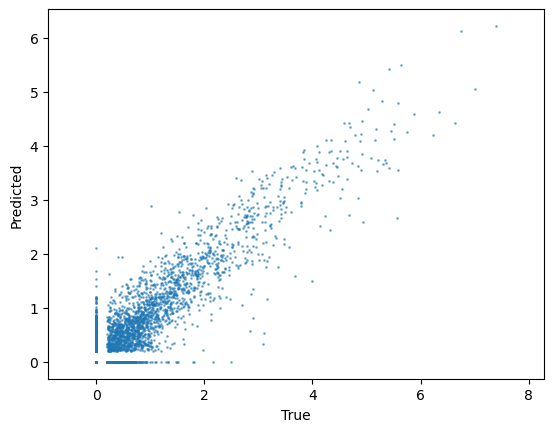

0.8861276078094584
0.06192627411752638


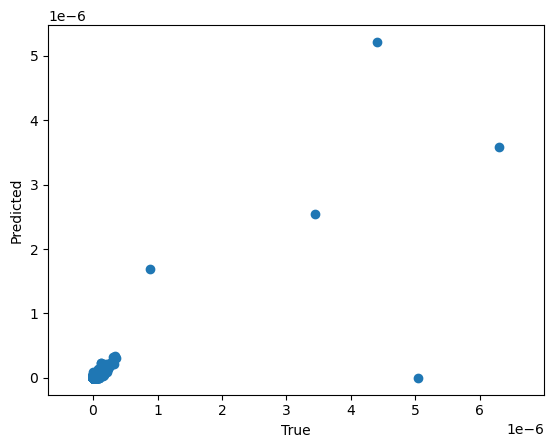

0.6470448076339734
0.23281059733539644


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def Gfit_one(obs, pred): #a normalized least-squares
    obs = np.array(obs)
    pred = np.array(pred)
    Gvalue = 1 - (2*np.sum(obs*pred)/(np.sum(obs**2)+np.sum(pred**2)))
    return Gvalue

#read as dataframe
eve_error = pd.read_csv('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/CT/out/model_direct_off[64, 128, 256]_on[16, 128, 128]_1658_true_pred_er_combined.csv', sep=",")
rate = pd.read_csv('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/CT/out/model_direct_off[64, 128, 256]_on[16, 128, 128]_1658_compile_combined.csv', sep=",")['mean_prob']
wl = pd.read_csv('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/CT/out/model_direct_off[64, 128, 256]_on[16, 128, 128]_1658_compile_combined.csv', sep=",")['max_off']
test = pd.read_csv('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/CT/out/model_direct_off[64, 128, 256]_on[16, 128, 128]_1658_compile_combined.csv', sep=",")['split']
test = test == 'test'

t=0.2

eve_error = eve_error[test]
rate = rate[test]
wl = wl[test]

#set negative values to 0
pred = eve_error['P10']
true = eve_error['T10']

pred[pred<0]=0
pred[pred<t]=0
true[true<t]=0

fig, ax = plt.subplots()
ax.scatter(true, pred, s=1,alpha=0.5)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')
plt.xlim(0,10)
plt.ylim(0,10)
plt.axis('equal')
plt.show()
print(r2_score(true, pred))
print(Gfit_one(true, pred))

true = true*rate*wl#*10000
pred = pred*rate*wl#*10000

# true[true > 1e-6]=0
# pred[pred > 1e-6]=0

fig, ax = plt.subplots()
ax.scatter(true, pred)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')
plt.xlim(0,0.5e-6)
plt.ylim(0,0.5e-6)
plt.axis('equal')
plt.show()
print(r2_score(true, pred))
print(Gfit_one(true, pred))

R Heatmap

/tmp/ipykernel_659317/4145856153.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 14)


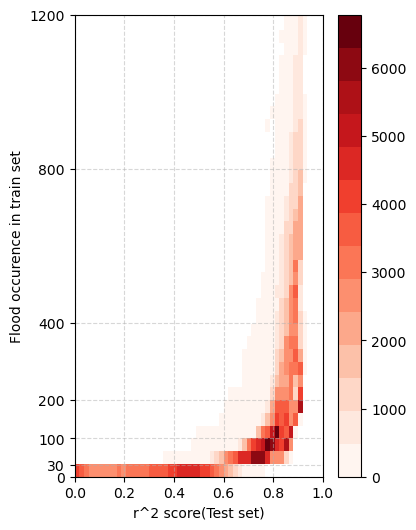

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mplcolors

#select particular representative gauge
reg = 'CT'
list_size = ['892','1658','3454','7071']   
columnname = str(38)
mask_size = '892'
train_size = list_size[1]

fig, ax = plt.subplots(1, 1, figsize=(4, 6))
df = pd.read_csv(f'/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/{reg}/PTHA/_Grid_scores_{train_size}.txt', sep=",")
df = df[df['r2'] > 0]
cmap = plt.cm.get_cmap('Reds', 14)
sns.histplot(data=df, x='r2', y='count_train', bins=50, pthresh=.001, cmap=cmap, cbar=True, ax=ax)
plt.yticks([0,30,100,200,400,800,1200])
plt.ylabel('Flood occurence in train set')
plt.xlabel('r^2 score(Test set)')
ax.grid(linestyle='dashed', alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1200)
plt.show()

#save figure
fig.savefig(f'plots/heatmap_Grid_scores_{train_size}.png', dpi=300, bbox_inches='tight')


G Heatmap

/tmp/ipykernel_659317/2446544274.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 14)


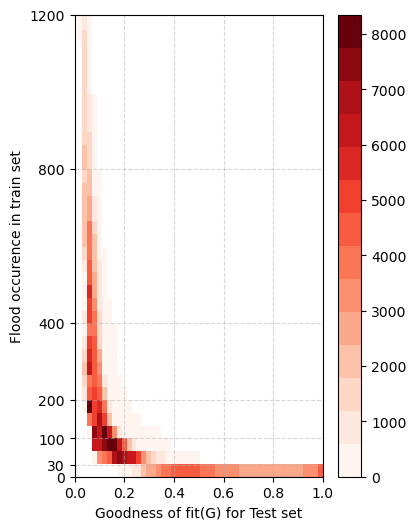

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mplcolors

#select particular representative gauge
reg = 'CT'
list_size = ['892','1658','3454','7071']   
columnname = str(38)
mask_size = '892'
train_size = list_size[1]

fig, ax = plt.subplots(1, 1, figsize=(4, 6))
df = pd.read_csv(f'/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/{reg}/PTHA/_Grid_scores_{train_size}.txt', sep=",")
df = df[df['Gfit'] < 1]
cmap = plt.cm.get_cmap('Reds', 14)
sns.histplot(data=df, x='Gfit', y='count_train', bins=50, pthresh=.001, cmap=cmap, ax=ax,alpha=1, cbar=True)
plt.yticks([0,30,100,200,400,800,1200])
plt.ylabel('Flood occurence in train set')
plt.xlabel('Goodness of fit(G) for Test set')
ax.grid(linestyle='dashed', alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1200)
plt.show()

#save figure
fig.savefig(f'plots/heatmap_Grid_scores_{train_size}g.png', dpi=300, bbox_inches='tight')


Prob Weighted

/tmp/ipykernel_659317/1680046484.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 14)


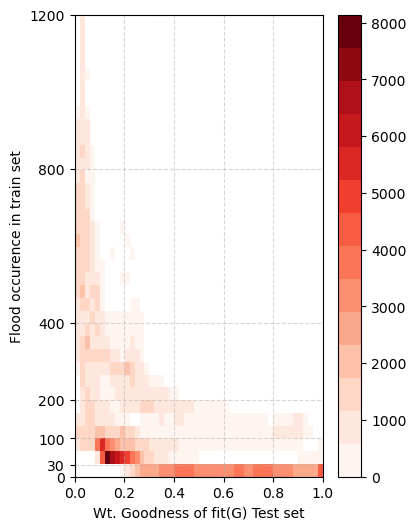

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mplcolors

#select particular representative gauge
reg = 'CT'
list_size = ['892','1658','3454','7071']   
columnname = str(38)
mask_size = '892'
train_size = list_size[1]

fig, ax = plt.subplots(1, 1, figsize=(4, 6))
df = pd.read_csv(f'/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/{reg}/PTHA/_Grid_scores_{train_size}_PSHalf.txt', sep=",")
df = df[df['Gfit_test_imp'] < 1]
cmap = plt.cm.get_cmap('Reds', 14)
sns.histplot(data=df, x='Gfit_test_imp', y='count_train', bins=50, pthresh=.1, cmap=cmap, ax=ax,alpha=1, cbar=True)
plt.yticks([0,30,100,200,400,800,1200])
plt.ylabel('Flood occurence in train set')
plt.xlabel('Wt. Goodness of fit(G) Test set')
ax.grid(linestyle='dashed', alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1200)
plt.show()

#save figure
fig.savefig(f'plots/heatmap_Grid_scores_{train_size}_wt.png', dpi=300, bbox_inches='tight')
